In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(file_path, header=0)
print(df.head())
print(df.info())
# Evaluate the dataset for missing data
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    #print("    ")

# --------------------------Replace with mean---------------------------

# astype() function converts the values to the desired data type
# axis=0 indicates that the mean value is to calculated across all column elements in a row.
avg_weight=df['Weight_kg'].astype('float').mean(axis=0)
print(avg_weight)
df['Weight_kg'].replace(np.nan, avg_weight,inplace=True)

#--------------------------Replace with the most frequent value (Mode) ------------------------------

common_s_size=df['Screen_Size_cm'].value_counts().idxmax()
print(common_s_size)
df['Screen_Size_cm'].replace(np.nan, common_s_size,inplace=True)
print(df.to_string())
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("    ")

#------------------------ Fixing the data types-------------------
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")
print(df.info())
print(df.head())

   Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0           0         Acer         4  IPS Panel    2   1         5   
1           1         Dell         3    Full HD    1   1         3   
2           2         Dell         3    Full HD    1   1         7   
3           3         Dell         4  IPS Panel    2   1         5   
4           4           HP         4    Full HD    2   1         7   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0          35.560            1.6       8             256       1.60    978  
1          39.624            2.0       4             256       2.20    634  
2          39.624            2.7       8             256       2.20    946  
3          33.782            1.6       8             128       1.22   1244  
4          39.624            1.8       8             256       1.91    837  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column 

In [9]:
#----------------------------------Data Standardization----------------------------------------
"""
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds.
Use the below mentioned units.

{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
"""
# Data standardization: convert weight from kg to pounds
df["Weight_kg"]=df["Weight_kg"]*2.205
df.rename(columns={"Weight_kg":"Weight_pounds"},inplace=True)

# Data standardization: convert screen size from cm to inch
df["Screen_Size_cm"] =df["Screen_Size_cm"]/2.54
df.rename(columns={"Screen_Size_cm":"Screen_Size_inch"}, inplace=True)

print(df.head())


   Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0           0         Acer         4  IPS Panel    2   1         5   
1           1         Dell         3    Full HD    1   1         3   
2           2         Dell         3    Full HD    1   1         7   
3           3         Dell         4  IPS Panel    2   1         5   
4           4           HP         4    Full HD    2   1         7   

   Screen_Size_inch  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  \
0              14.0            1.6       8             256        3.52800   
1              15.6            2.0       4             256        4.85100   
2              15.6            2.7       8             256        4.85100   
3              13.3            1.6       8             128        2.69010   
4              15.6            1.8       8             256        4.21155   

   Price  
0    978  
1    634  
2    946  
3   1244  
4    837  


In [10]:
#---------------------------------------------Data Normalization--------------------------------
#Normalize the data in a column such that the values are restricted between 0 and 1.


df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

print(df.to_string())



     Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  Screen_Size_inch  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  Price
0             0         Acer         4  IPS Panel    2   1         5              14.0       0.551724       8             256       3.528000    978
1             1         Dell         3    Full HD    1   1         3              15.6       0.689655       4             256       4.851000    634
2             2         Dell         3    Full HD    1   1         7              15.6       0.931034       8             256       4.851000    946
3             3         Dell         4  IPS Panel    2   1         5              13.3       0.551724       8             128       2.690100   1244
4             4           HP         4    Full HD    2   1         7              15.6       0.620690       8             256       4.211550    837
5             5         Dell         3    Full HD    1   1         5              15.6       0.551724       8   

   Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_inch  \
0           0         Acer         4    2   1         5              14.0   
1           1         Dell         3    1   1         3              15.6   
2           2         Dell         3    1   1         7              15.6   
3           3         Dell         4    2   1         5              13.3   
4           4           HP         4    2   1         7              15.6   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  Price Price-binned  \
0       0.551724       8             256        3.52800    978          Low   
1       0.689655       4             256        4.85100    634          Low   
2       0.931034       8             256        4.85100    946          Low   
3       0.551724       8             128        2.69010   1244          Low   
4       0.620690       8             256        4.21155    837          Low   

   Screen-Full_HD  Screen-IPS_panel  
0           False       

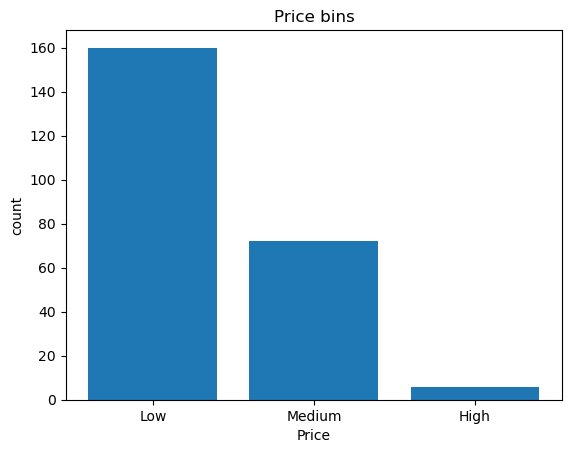

In [13]:
#--------------------------------------------------- Binning ----------------------------------------
"""
Binning is a process of creating a categorical attribute which splits the values of a continuous data
into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". 
These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".

"""

bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )

print(df.head())
#print(df.to_string())

# plot the bar graph of these bins.
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")
print(df.head())


In [12]:
#------------------------------------------------ Indicator variables -------------------------------
"""Convert the "Screen" attribute of the dataset into 2 indicator variables, 
"Screen-IPS_panel" and "Screen-Full_HD". 
Then drop the "Screen" attribute from the dataset."""

#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

print(df.head())

   Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_inch  \
0           0         Acer         4    2   1         5              14.0   
1           1         Dell         3    1   1         3              15.6   
2           2         Dell         3    1   1         7              15.6   
3           3         Dell         4    2   1         5              13.3   
4           4           HP         4    2   1         7              15.6   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  Price Price-binned  \
0       0.551724       8             256        3.52800    978          Low   
1       0.689655       4             256        4.85100    634          Low   
2       0.931034       8             256        4.85100    946          Low   
3       0.551724       8             128        2.69010   1244          Low   
4       0.620690       8             256        4.21155    837          Low   

   Screen-Full_HD  Screen-IPS_panel  
0           False       